<a href="https://colab.research.google.com/github/amlanmohanty1/Image-Classifier-using-Machine-Learning/blob/main/Image_Classification_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
import bing_image_downloader

In [3]:
cd /content/drive/My Drive

/content/drive/My Drive


In [4]:
!mkdir images1

mkdir: cannot create directory ‘images1’: File exists


In [5]:
from bing_image_downloader import downloader
downloader.download('apple fruit', limit=30,  output_dir='images1', adult_filter_off=False, force_replace=True, timeout=60)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://plant.daleysfruit.com.au/trees/m/Star-Apple-268.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.kb.jniplants.com/wp-content/uploads/2017/08/evans-bali-cherry-prunus-cerasus-ftimg.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/grapes-1080x1920-4k-15355.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://costcocouple.com/wp-content/uploads/2013/07/Kirkland-Signature-Organic-Ground-Beef-Costco-4-640x480.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://shyliane.s.h.pic.centerblog.net/0_1082da_c1b36fad_L.png
[%] File Downloaded !

[%] Downloading Image #6 from http://www.minnesotawildflowers.info/udata/r9ndp23q/white/canada-mayflower_0608_125115.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.animalfactsencyclopedia.com/image-files/batupsidedown.jpg
[%] File Downloaded !

[

In [6]:
from bing_image_downloader import downloader
downloader.download('lemon fruit', limit=30,  output_dir='images1', adult_filter_off=False, force_replace=True, timeout=60)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.somuchviral.com/wp-content/uploads/2015/01/buddha-hand.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.julietstallwoodcakesandbiscuits.co.uk/home/wp-content/uploads/2011/06/hydrangea-4-tier-wedding-cake-web.jpg
[!] Issue getting: http://www.julietstallwoodcakesandbiscuits.co.uk/home/wp-content/uploads/2011/06/hydrangea-4-tier-wedding-cake-web.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from http://urmc.rochester.edu/getmedia/2492fe31-8439-4b68-bdae-0c7b074e5146/1-DSCN2119.aspx?width=240&amp;height=320
[%] File Downloaded !

[%] Downloading Image #3 from https://wallpapershome.com/images/wallpapers/ice-1920x1080-4k-hd-wallpaper-android-pattern-blue-background-4019.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.thediaryofarealhousewife.com/wp-content/uploads/2019/06/Fruit-Salad-2.jpg
[%] File Downloaded !

[%] Downloading Im

In [7]:
import numpy as np
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

target = []
images = []   # In matrix format
flat_data = []  # In vector format

DATADIR = '/content/drive/My Drive/images1'
CATEGORIES = ['apple fruit','lemon fruit']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

target = np.array(target)
images = np.array(images)
flat_data = np.array(flat_data)

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,random_state=0)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C': [1,10,100,100], 'kernel': ['linear']},
            {'C': [1,10,100,100], 'gamma': [0.001,0.0001], 'kernel': ['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 100], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [10]:
y_pred = clf.predict(x_test)

In [11]:
y_pred

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [12]:
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1])

In [13]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.5333333333333333

In [14]:
# Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [15]:
model = pickle.load(open('img_model.p','rb'))

Enter your urlhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSX2X08oCK1BJ2jE1wTgdKGSzoSa_jwCJ_UWQ&usqp=CAU
Predicted output: lemon fruit


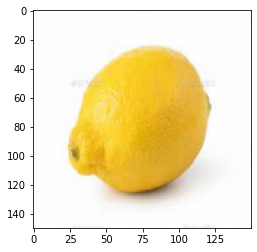

In [16]:
flat_data=[]
url = input("Enter your url")
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
plt.imshow(img_resized)
y_out=clf.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f"Predicted output: {y_out}")

In [17]:
!pip install streamlit

!pip install pyngrok===4.1.1
from pyngrok import ngrok

     |████████████████████████████████| 7.4MB 5.3MB/s 
     |████████████████████████████████| 163kB 41.9MB/s 
     |████████████████████████████████| 112kB 47.6MB/s 
     |████████████████████████████████| 102kB 11.4MB/s 
     |████████████████████████████████| 6.9MB 37.1MB/s 
     |████████████████████████████████| 4.5MB 44.5MB/s 
     |████████████████████████████████| 133kB 51.2MB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 143kB 44.4MB/s 
     |████████████████████████████████| 122kB 47.2MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
  Created wheel for blinker: filename=blinker-1.4-cp36-none-any.whl size=13450 sha256=ac2738f98753a74ea50bfddda8c7c7995e4f89666056bd5cbe2bedf1baa3515f
  Stored in directory: /root/.cache/pip/wheels/92/a0/00/8690a57883956a301d91cf4ec999cc0b258b01e3f548f86e89
  Created wheel for watchdog: filename=watchdog-0.10.4-cp36-none-any.whl size=74841 sha256=b124f8b673d547c271cb6f59ea5175664331975b

  Created wheel for pyngrok: filename=pyngrok-4.1.1-cp36-none-any.whl size=15971 sha256=63ec5d537cbedd5ec9c15abb0c02c93a0c9ddb18e28fbe722990b93910d2319a
  Stored in directory: /root/.cache/pip/wheels/97/71/0d/1695f7c8815c0beb3b5d9b35d6eec9243c87e6070fbe3977fa
Successfully built pyngrok


In [27]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle 
from PIL import Image
st.set_option('deprecation.showfileUploaderEncoding', False)
st.set_page_config(page_title="Image Classification Web App",page_icon="",layout="centered",initial_sidebar_state="expanded")
st.title('Image Classifier using Machine Learning')
st.subheader('by Amlan Mohanty ')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

st.markdown("""
<style>
body {
    color: #000099;
    background-color: #669999;
    etc. 
}
</style>
    """, unsafe_allow_html=True)


uploaded_file = st.file_uploader("Choose an image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['apple fruit','lemon fruit']
    st.write('Result...')
    flat_data=[]
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')


st.sidebar.subheader("About App")

st.sidebar.info("This web app is made as part of Image Classification Project")
st.sidebar.info("Browse the image you want to upload or simply drag and drop the image")
st.sidebar.info("Click on the 'Predict' button to check whether the uploaded image is of 'Apple' or 'Lemon' ")
st.sidebar.info("Don't forget to rate this app")



feedback = st.sidebar.slider('How much would you rate this app?',min_value=0,max_value=10,step=1)

if feedback:
  st.header("Thank you for rating the app!")

Overwriting app.py


In [19]:
!nohup streamlit run app.py &

url = ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://cbab314b1502.ngrok.io'